In [9]:
%pylab inline
%matplotlib
#%%writefile ../crypto_chaotic/audioClient.py
#!/usr/bin/env python

import pyaudio
import wave
from twisted.internet.protocol import DatagramProtocol
from twisted.internet import reactor
import numpy as np
from crypto_chaotic.modulation import drawfft
from matplotlib import rcParams
import matplotlib.pyplot as plt
from random import randrange
from crypto_chaotic import lorenz_attractor, modulation
#from scipy.fftpack import rfft, irfft, fftfreq

CHUNK = 44100*5
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
#RECORD_SECONDS = 60*60

tstep = 0.001 #0.0001
ndrop = 1500 #15000
N = 4

Amplification = 100000 #500000


def drawfft(signals, d=1, xlow=0, xhigh=0, ylow=0, yhigh=0):
    plt.figure(figsize=(15, 5))    
    if xlow < xhigh:
        plt.xlim([xlow,xhigh])
    if ylow < yhigh:
        plt.ylim([ylow,yhigh])
        
    for i in signals:
        sp = np.abs(np.fft.fft(i))
        freq = np.fft.fftfreq(len(sp), d=d)

        Nindex = np.argmax(freq < 0)
        #freq1 = np.append(freq[Nindex:], freq[:Nindex])
        #sp1 = np.append(sp[Nindex:], sp[:Nindex])
        freq1 = freq[:Nindex]/d
        sp1 = sp[:Nindex]
        print freq1
        plt.plot(freq1, sp1)
    plt.show()

Populating the interactive namespace from numpy and matplotlib
Using matplotlib backend: agg


### Voice Capture and preprocessing at Transmitter

In [27]:
p = pyaudio.PyAudio()

inputStream = p.open(format=FORMAT,
                     channels=CHANNELS,
                     rate=RATE,
                     input=True,
                     frames_per_buffer=CHUNK)

voicestream = inputStream.read(CHUNK)
inputStream.close()

#########################################
###     Voice Data                    ###
#########################################
modsig = np.fromstring(voicestream, dtype=np.int16)

#########################################
###         Frequency Domain          ###
#########################################
d=(1.0 * CHUNK)/RATE
#W = fftfreq(modsig.size, d=d)
f_signal = rfft(modsig)

#########################################
###              Filter               ###
#########################################
minm = (1.0*100*d)
maxm = (1.0*18000*d)

cut_f_signal = f_signal.copy()
for j in range(len(cut_f_signal)):
    if j < minm:
        cut_f_signal[j] = 0
    elif j > maxm:
        cut_f_signal[j] = 0

#########################################
###            Time Domain            ###
#########################################
tcut_signal0 = irfft(cut_f_signal)

Populating the interactive namespace from numpy and matplotlib
(0, -1)


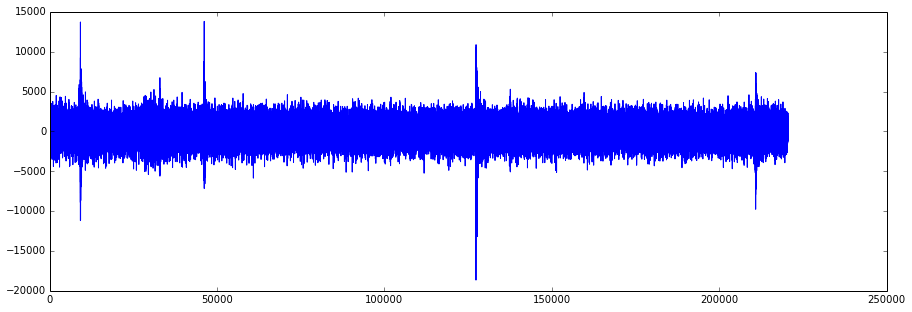

[  0.00000000e+00   1.81405896e-07   3.62811791e-07 ...,   1.99994558e-02
   1.99996372e-02   1.99998186e-02]


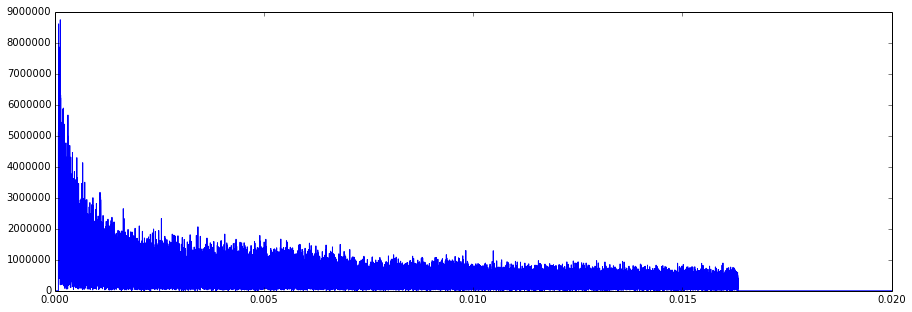

In [28]:
%pylab inline
modulation.plotamp([tcut_signal0], xmin = 0, xmax = 0)
drawfft([tcut_signal0], d=d, xlow=0, xhigh=0, ylow=0, yhigh=0)

### Ploting Time series and FFT expanded signal by introducing alternate zeros

In [29]:
Samples = 2
cut_samples=np.zeros(len(tcut_signal0)*Samples, dtype=np.float64)
cut_samples[0::Samples] = tcut_signal0

#### Full Time Series Signal

(0, -1)


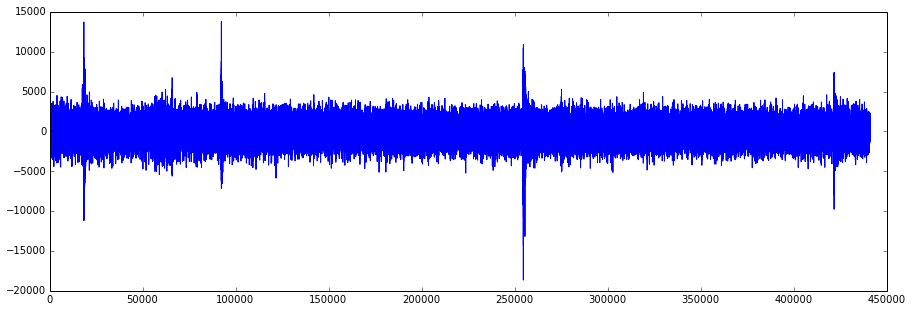

In [30]:
modulation.plotamp([cut_samples], xmin = 0, xmax = 0)

#### Partial Time Series Signal

(0, 100)


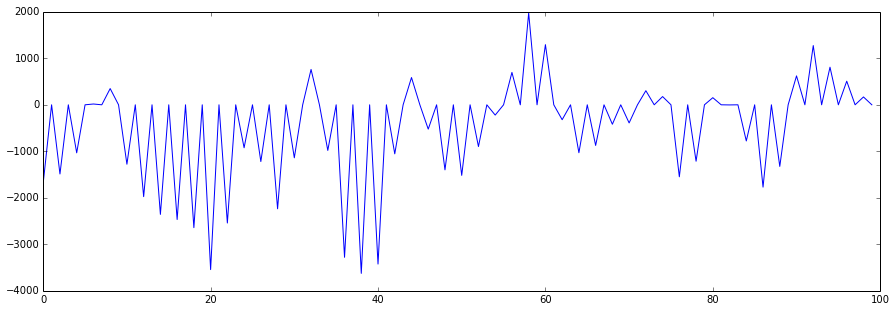

In [31]:
modulation.plotamp([cut_samples], xmin = 0, xmax = 100)

#### FFT

[  0.00000000e+00   9.07029478e-08   1.81405896e-07 ...,   1.99997279e-02
   1.99998186e-02   1.99999093e-02]


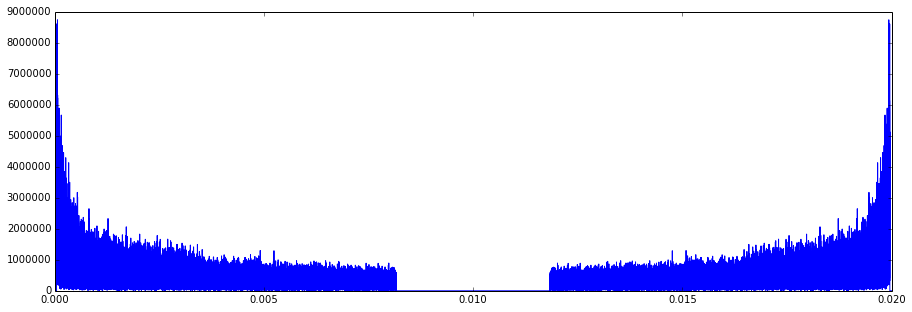

In [32]:
drawfft([cut_samples],  d=d, xlow=0, xhigh=0, ylow=0, yhigh=0)

### Ploting Time series and FFT expanded signal by introducing 100 zeros between two samples

In [33]:
Samples = 100
cut_samples=np.zeros(len(tcut_signal0)*Samples, dtype=np.float64)
cut_samples[0::Samples] = tcut_signal0

#### Full Time Series Signal

(0, -1)


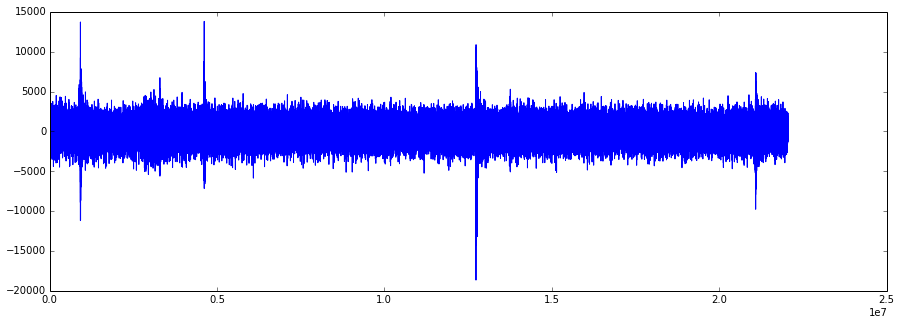

In [34]:
modulation.plotamp([cut_samples], xmin = 0, xmax = 0)

#### Partial Time Series Signal

(0, 10000)


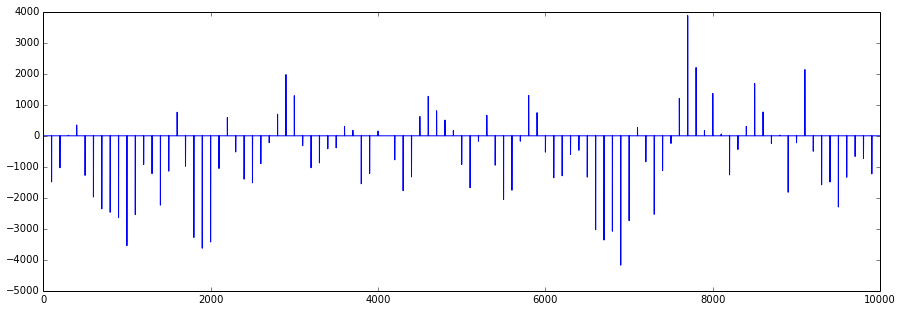

In [35]:
modulation.plotamp([cut_samples], xmin = 0, xmax = 10000)

#### FFT

[  0.00000000e+00   1.81405896e-09   3.62811791e-09 ...,   1.99999946e-02
   1.99999964e-02   1.99999982e-02]


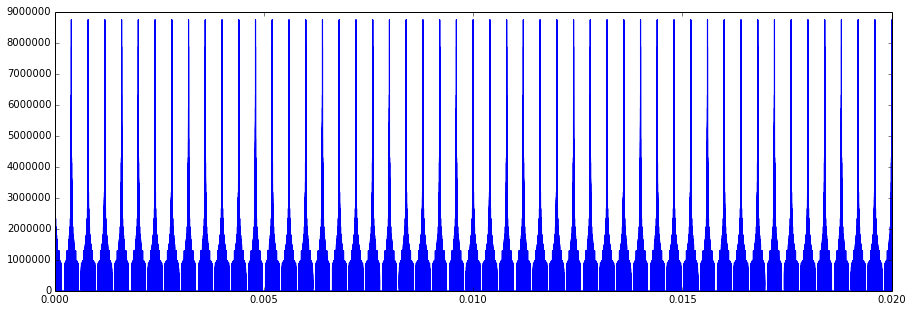

In [36]:
drawfft([cut_samples],  d=d, xlow=0, xhigh=0, ylow=0, yhigh=0)